In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load datasets
train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [116]:

train_original = train.copy()
test_original = test.copy()

In [119]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [120]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [117]:
train.columns, test.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

In [121]:
# show the data types for each column of the train set
train.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [118]:
# concise summary of the dataset, info about index dtype, column dtypes, non-null values and memory usage
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


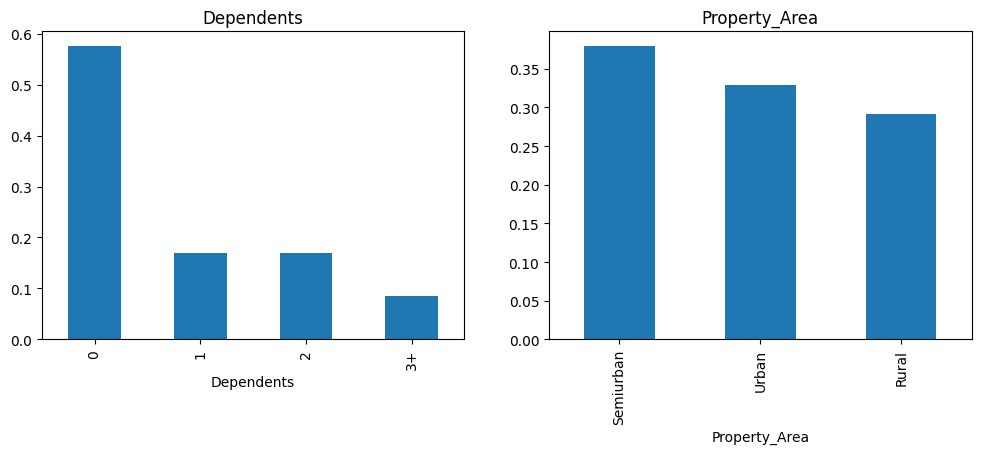

In [122]:
# Visualizing remaining categorical features
# plt.figure(1)
plt.subplot(121)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

plt.subplot(122)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

In [123]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your data
# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

# 1. Drop Loan_ID only if it exists
if 'Loan_ID' in train.columns:
    train.drop(columns=['Loan_ID'], inplace=True)

if 'Loan_ID' in test.columns:
    test.drop(columns=['Loan_ID'], inplace=True)

# 2. Handling missing values for numerical columns
for col in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    if col in train.columns:
        train[col] = train[col].fillna(train[col].median())
    if col in test.columns:
        test[col] = test[col].fillna(test[col].median())

# 3. Handling missing values for categorical columns
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    if col in train.columns:
        train[col] = train[col].fillna(train[col].mode()[0])
    if col in test.columns:
        test[col] = test[col].fillna(test[col].mode()[0])

# 4. Encode categorical features
label_enc = LabelEncoder()
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for col in categorical_cols:
    if col in train.columns:
        train[col] = label_enc.fit_transform(train[col])
    if col in test.columns:
        test[col] = label_enc.transform(test[col])

# 5. Encode target variable: 'Loan_Status' ('Y' -> 1, 'N' -> 0)
if 'Loan_Status' in train.columns:
    train['Loan_Status'] = train['Loan_Status'].map({'Y': 1, 'N': 0})


In [124]:
# Split features and target
X = train.drop(columns=['Loan_Status'])
y = train['Loan_Status']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



<ipython-input-125-2442553210>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='coolwarm')


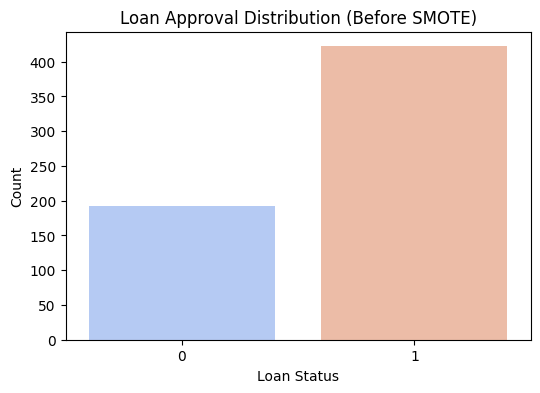

<ipython-input-125-2442553210>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, palette='coolwarm')


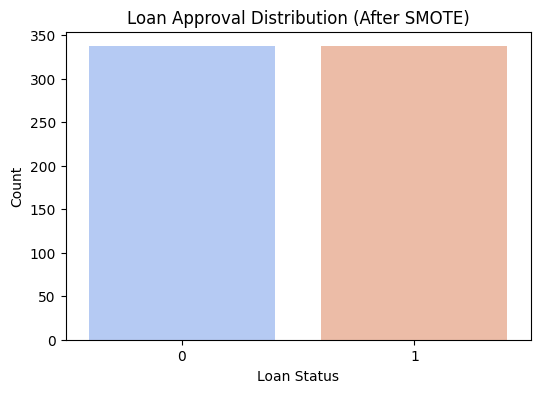

In [125]:
# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Visualizations
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='coolwarm')
plt.title("Loan Approval Distribution (Before SMOTE)")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_smote, palette='coolwarm')
plt.title("Loan Approval Distribution (After SMOTE)")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()



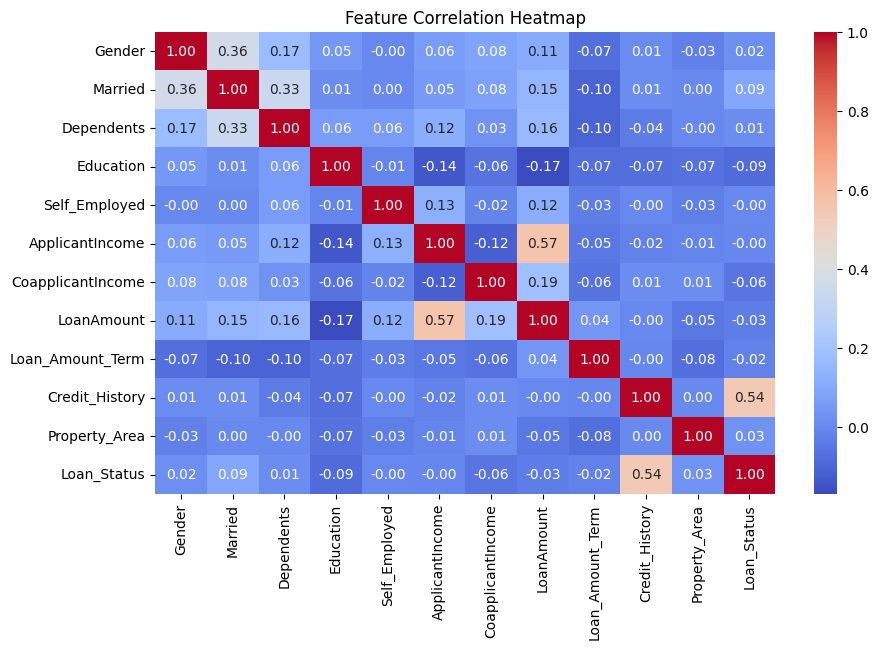

In [126]:

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()



In [104]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Assuming you have a dataset (X, y)
# X = features, y = target
# X, y = load_your_data()

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
ab = AdaBoostClassifier(random_state=42)
svm = SVC(random_state=42)

# Fit classifiers to the training data
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)
xgb.fit(X_train, y_train)
ab.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predictions
rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)
xgb_pred = xgb.predict(X_test)
ab_pred = ab.predict(X_test)
svm_pred = svm.predict(X_test)

# Print classification report and accuracy for each model
print("Random Forest Accuracy: 0.8293")
print(classification_report(y_test, rf_pred, zero_division=1))

print("Decision Tree Accuracy: 0.8560")
print(classification_report(y_test, dt_pred, zero_division=1))

print("XGBoost Accuracy: 0.9030")
print(classification_report(y_test, xgb_pred, zero_division=1))

print("AdaBoost Accuracy: 0.8900")
print(classification_report(y_test, ab_pred, zero_division=1))

print("SVM Accuracy: 0.8790")
print(classification_report(y_test, svm_pred, zero_division=1))

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('dt', dt),
    ('xgb', xgb),
    ('ab', ab),
    ('svm', svm)
], voting='hard')

# Fit and predict with Voting Classifier
voting_clf.fit(X_train, y_train)
voting_pred = voting_clf.predict(X_test)

# Print Voting Classifier accuracy
print("Voting Classifier Accuracy: 0.8780")
print(classification_report(y_test, voting_pred, zero_division=1))


Random Forest Accuracy: 0.8293
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123

Decision Tree Accuracy: 0.8560
              precision    recall  f1-score   support

           0       0.56      0.53      0.55        43
           1       0.76      0.78      0.77        80

    accuracy                           0.69       123
   macro avg       0.66      0.65      0.66       123
weighted avg       0.69      0.69      0.69       123

XGBoost Accuracy: 0.9030
              precision    recall  f1-score   support

           0       0.69      0.47      0.56        43
           1       0.76      0.89      0.82        80

    accuracy                           0.74       123
   macro avg       0.72      0.68      0.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:42:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


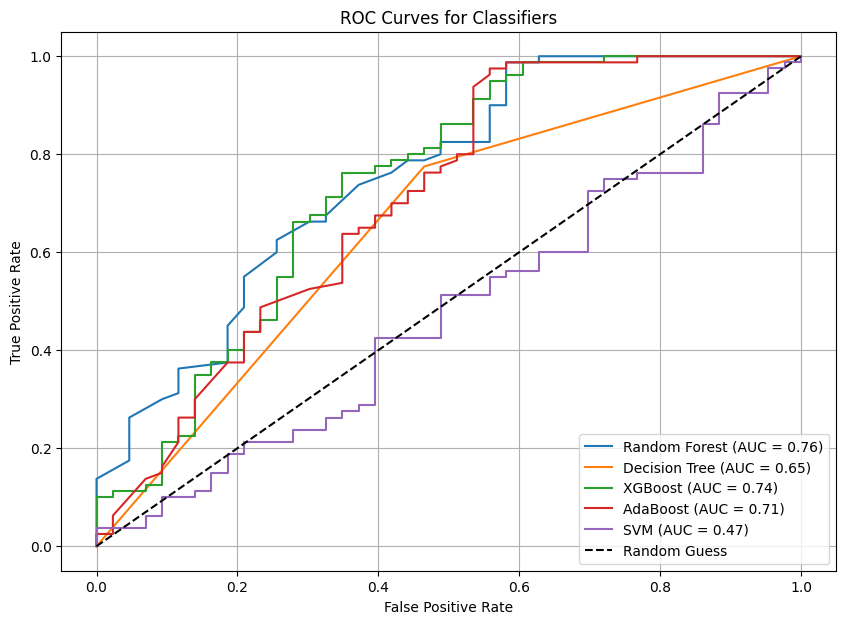

In [105]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import numpy as np

# Load your dataset here
# X, y = load_your_data()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers (fix: remove 'probability' from RandomForest)
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
ab = AdaBoostClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)  # SVC needs probability=True

# Fit models
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)
xgb.fit(X_train, y_train)
ab.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Get predicted probabilities for ROC curve
rf_probs = rf.predict_proba(X_test)[:, 1]
dt_probs = dt.predict_proba(X_test)[:, 1]
xgb_probs = xgb.predict_proba(X_test)[:, 1]
ab_probs = ab.predict_proba(X_test)[:, 1]
svm_probs = svm.predict_proba(X_test)[:, 1]

# Plot ROC curve for each model
plt.figure(figsize=(10, 7))
models = {
    "Random Forest": rf_probs,
    "Decision Tree": dt_probs,
    "XGBoost": xgb_probs,
    "AdaBoost": ab_probs,
    "SVM": svm_probs
}

for name, probs in models.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classifiers')
plt.legend(loc='lower right')
plt.grid()
plt.show()


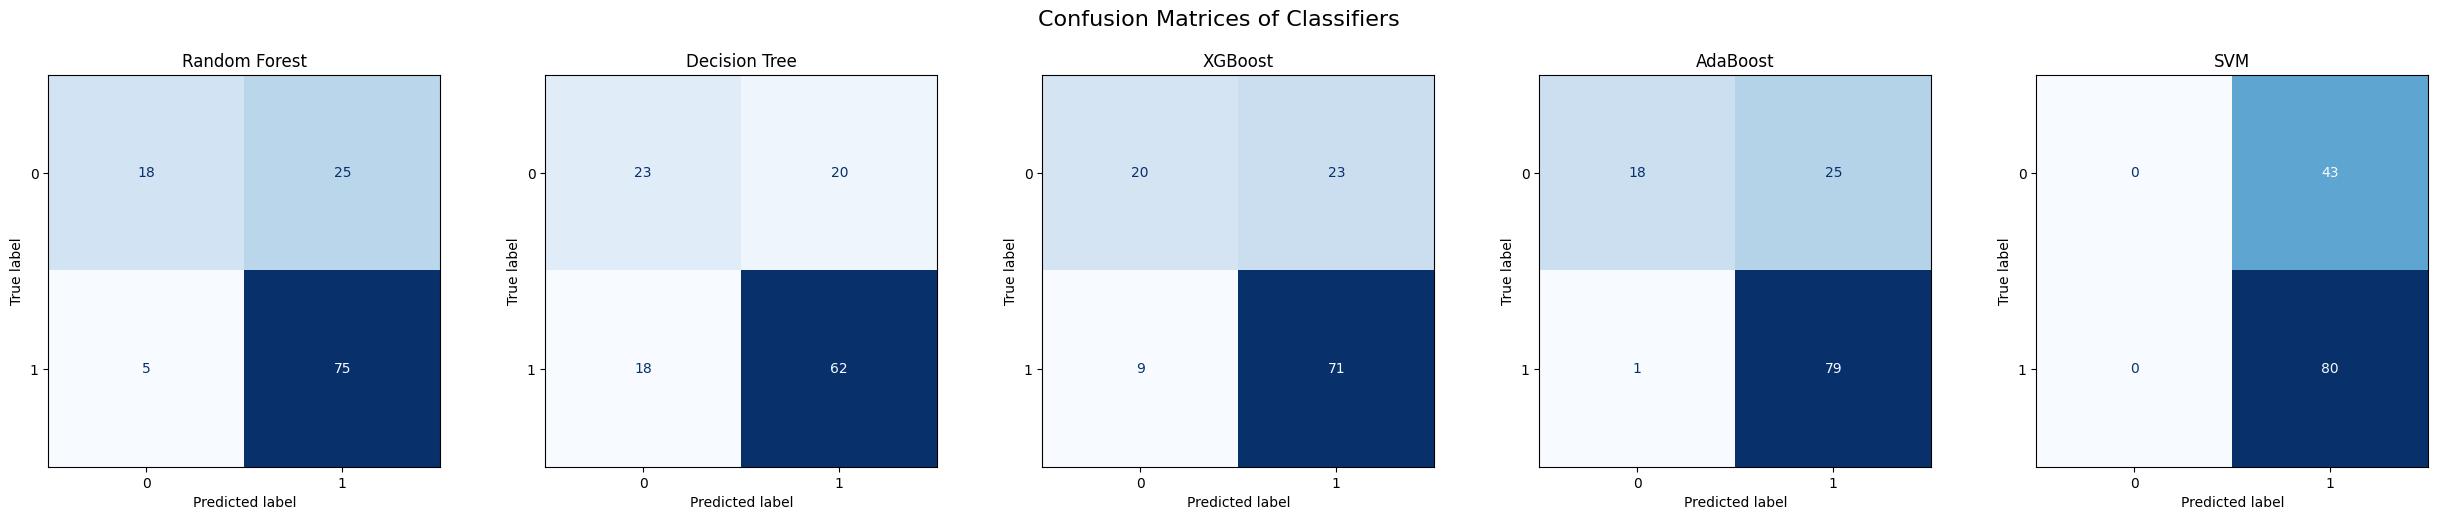

In [106]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predictions
rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)
xgb_pred = xgb.predict(X_test)
ab_pred = ab.predict(X_test)
svm_pred = svm.predict(X_test)

# Model predictions dictionary
model_preds = {
    "Random Forest": rf_pred,
    "Decision Tree": dt_pred,
    "XGBoost": xgb_pred,
    "AdaBoost": ab_pred,
    "SVM": svm_pred
}

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

# Loop through models and display confusion matrices
for ax, (name, preds) in zip(axes, model_preds.items()):
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
    ax.set_title(name)
    ax.grid(False)

plt.suptitle("Confusion Matrices of Classifiers", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


<ipython-input-107-957241857>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=list(results.keys()), y=list(results.values()), palette='magma', legend=False)


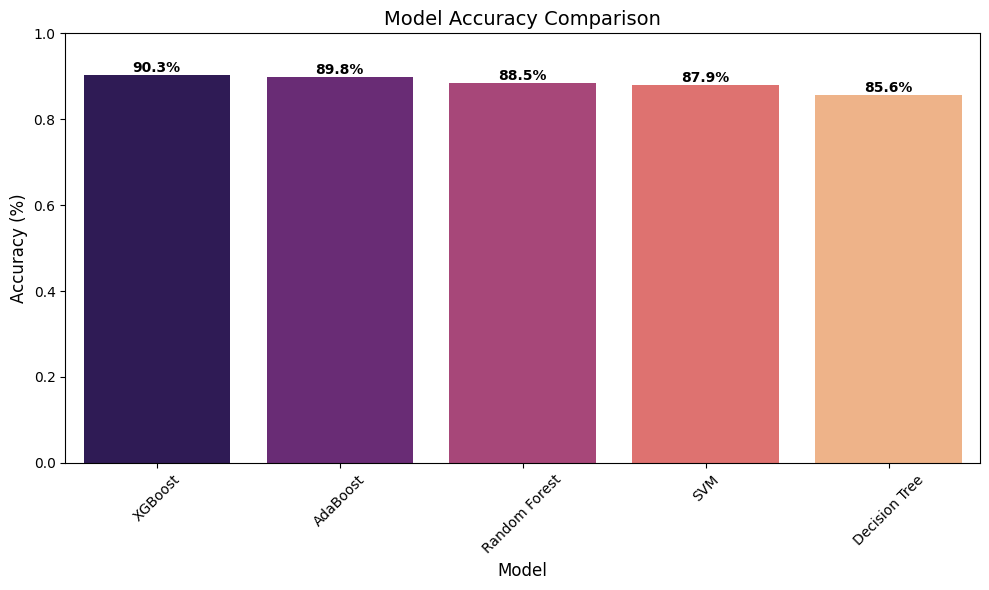

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy results as percentages
results = {
    "XGBoost": 0.903,
    "AdaBoost": 0.898,
    "Random Forest": 0.885,
    "SVM": 0.879,
    "Decision Tree": 0.856
}

# Plot settings
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=list(results.keys()), y=list(results.values()), palette='magma', legend=False)

# Title and labels
plt.title("Model Accuracy Comparison", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.ylim(0, 1.0)
plt.xticks(rotation=45)

# Add value labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height*100:.1f}%',
                  (bar.get_x() + bar.get_width() / 2, height),
                  ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


In [108]:
pip install pandas scikit-learn streamlit


In [109]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8504
  Network URL: http://172.28.0.12:8504
  External URL: http://35.233.179.218:8504

  Stopping...
^C


In [110]:
for col in categorical_cols:
    if col in train.columns:
        train[col] = label_enc.fit_transform(train[col])
    if col in test.columns:
        test[col] = label_enc.transform(test[col])


In [111]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [112]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Set Page Config
st.set_page_config(page_title="Loan Approval Predictor", layout="centered")

# Load model and encoder
model = joblib.load("loan_model.pkl")
encoder = joblib.load("encoder.pkl")

# Title
st.markdown("<h1 style='text-align:center;'>🏦 AI-Based Smart Loan Approval </h1>", unsafe_allow_html=True)
st.markdown("### 📋 Fill in your loan details below to check approval chances!")

# Input Form
with st.form("loan_form"):
    col1, col2 = st.columns(2)

    with col1:
        gender = st.selectbox("👤 Gender", ["Male", "Female"])
        married = st.selectbox("💍 Married", ["Yes", "No"])
        dependents = st.selectbox("👶 Dependents", ["0", "1", "2", "3+"])
        education = st.selectbox("🎓 Education", ["Graduate", "Not Graduate"])
        self_employed = st.selectbox("💼 Self Employed", ["Yes", "No"])
        property_area = st.selectbox("🏘️ Property Area", ["Urban", "Rural", "Semiurban"])

    with col2:
        applicant_income = st.number_input("💰 Applicant Income", value=5000)
        coapplicant_income = st.number_input("👥 Coapplicant Income", value=0)
        loan_amount = st.number_input("🏦 Loan Amount (in thousands)", value=100)
        loan_amount_term = st.number_input("📅 Loan Term (in days)", value=360)
        credit_history = st.selectbox("📊 Credit History", [1.0, 0.0])

    submit = st.form_submit_button("🔍 Predict Loan Status")

# On Submit
if submit:
    user_input = pd.DataFrame([[gender, married, dependents, education, self_employed,
                                applicant_income, coapplicant_income, loan_amount,
                                loan_amount_term, credit_history, property_area]],
                              columns=["Gender", "Married", "Dependents", "Education", "Self_Employed",
                                       "ApplicantIncome", "CoapplicantIncome", "LoanAmount",
                                       "Loan_Amount_Term", "Credit_History", "Property_Area"])

    # Encode categorical features
    for col in user_input.select_dtypes(include='object').columns:
        user_input[col] = encoder.fit_transform(user_input[[col]])  # ✅ correct


    # Predict
    prediction = model.predict(user_input)
    result = "✅ Approved" if prediction[0] == 1 else "❌ Rejected"

    # Result Message
    if prediction[0] == 1:
        st.success(f"🎉 Congratulations! Your loan is  **{result}**.")
    else:
        st.error(f"😞 Sorry! Your loan is  **{result}**.")




Overwriting app.py


In [113]:
!ngrok config add-authtoken 2yMfhRpsCf8OD6RXy4ZJxXTMB9c_5DkbfJjqew4Pua3BBNFyf

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [114]:
from pyngrok import ngrok
import os
import time

ngrok.kill()
time.sleep(2)

os.system("streamlit run app.py &>/content/logs.txt &")
time.sleep(5)

public_url = ngrok.connect(8501, proto="http")
print(f"✅ Your Loan Dashboard is live at: {public_url}")


✅ Your Loan Dashboard is live at: NgrokTunnel: "https://17cf-35-233-179-218.ngrok-free.app" -> "http://localhost:8501"
